In [1]:
import tweepy, json, pymongo
import pandas as pd
import numpy as np
from twitterscraper import *
from utils import *
from analysis import *
from TextAnalysis import *

In [2]:
keys = getApiKeys(fileName='apiConf.txt')
startTwitterApi(keys=keys)

In [2]:
######### BITCOIN ANALYSIS
###Please start mongod before running if useMongo
useMongo=True
collection="bitcoinOriginal"
if useMongo:
    syncCollections()


Checking all the files needed are currently in MongoDB...
checking for collection: ballonDOrLate
Done. Tweets correctly loaded
checking for collection: bitcoinOriginal
Done. Tweets correctly loaded
checking for collection: americanElectionsOriginal
Done. Tweets correctly loaded
checking for collection: ballonDOrOriginal
Done. Tweets correctly loaded
Done. MongoDB now contains all the Tweets.


In [4]:
#retrieving bitcoin tweets previously saved on mongodb
bitcoinTweets = loadTweets(collectionName=collection,fromDb=useMongo, dbName='')

Done. Tweets correctly loaded


In [5]:
#shows all the keys found in the tweets collection
allKeys = set()
for tweet in bitcoinTweets:
    allKeys.update(tweet.keys())
    
allKeys

{'coordinates', 'reply_count', 'retweet_count', 'user'}

In [6]:
#instantiating a pandas dataframe for the bitcoin tweets
tweetsDf = pd.DataFrame(bitcoinTweets)

In [7]:
#MAPPING NUMBER OF TWEETS WRITTEN BY A USER(AS KEY) WITH THE CORRISPONDING NUMBER OF USERS THAT HAVE WRITTEN THAT NUMBER OF TWEETS
#EG-> 1: 4275 MEANS THAT 4275 OF THE USERS HAVE WRITTEN JUST ONE TWEET OF THE TWEETS RETRIEVED)

tweetsDf['usId']=[user['id'] for user in tweetsDf['user']]
l = list(tweetsDf['usId'].value_counts())
d = {x:l.count(x) for x in l}
vls = list(d.values())
ks = list(d.keys())
sum([vls[i]*ks[i] for i in range(len(list(d.values())))])
#sum(d.values()*d.keys())
d


{2: 4275,
 4: 1153,
 6: 364,
 8: 258,
 10: 210,
 12: 105,
 14: 130,
 16: 85,
 18: 66,
 20: 92,
 22: 13,
 24: 17,
 26: 10,
 28: 7,
 30: 3,
 32: 6,
 34: 1,
 36: 5,
 38: 2,
 40: 1,
 42: 1,
 44: 1,
 48: 1,
 50: 2,
 64: 1,
 66: 1,
 68: 1,
 80: 1,
 82: 1,
 86: 1,
 92: 1,
 96: 1,
 146: 1}

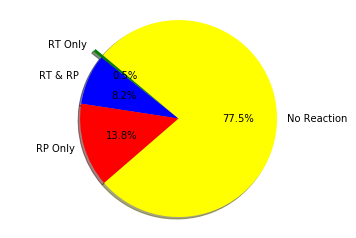

In [8]:
#FAKE ANALYSIS OF RETWEETED, REPLIED TWEETS


rtrp=0.082389
rtnrp=0.004611
rpnrt=0.137611
others=1-rtrp-rtnrp-rpnrt
others

tags = ['RT Only','RT & RP','RP Only', 'No Reaction']
tags

values = [rtnrp,rtrp,rpnrt,others]
#values.append(sum(list(othersLangs.get(i) for i in othersLangs)))
values

import matplotlib.pyplot as plt

colors = ['green', 'blue', 'red', 'yellow']
explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(values, explode=explode, labels=tags, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

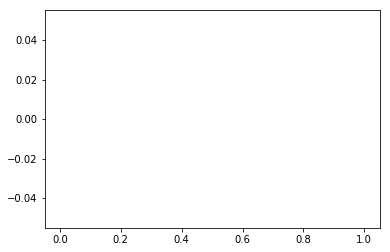

In [11]:
plt.hist(tweetsDf['retweet_count'][tweetsDf['retweet_count']>0])
plt.show()

In [12]:
len(tweetsDf[tweetsDf['retweet_count']>0])

0

In [13]:
######### BALLONDOR ANALYSIS


#retrieving bitcoin tweets previously saved on mongodb (to do that, please remember to start mongod service)
ballondorTweets = loadTweets(collectionName='ballonDOrLate',fromDb=True, dbName='tweets')



Done. Tweets correctly loaded


In [14]:
#shows all the keys found in the tweets collection
allKeys = set()
for tweet in ballondorTweets:
    allKeys.update(tweet.keys())
    
allKeys

{'contributors',
 'coordinates',
 'created_at',
 'display_text_range',
 'entities',
 'extended_entities',
 'extended_tweet',
 'favorite_count',
 'favorited',
 'filter_level',
 'geo',
 'id',
 'id_str',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'is_quote_status',
 'lang',
 'place',
 'possibly_sensitive',
 'quote_count',
 'quoted_status',
 'quoted_status_id',
 'quoted_status_id_str',
 'reply_count',
 'retweet_count',
 'retweeted',
 'retweeted_status',
 'source',
 'text',
 'timestamp_ms',
 'truncated',
 'user'}

In [15]:
attrToRemove = ['id','id_str','in_reply_to_screen_name','in_reply_to_status_id_str','in_reply_to_user_id',
            'in_reply_to_user_id_str','quoted_status_id_str','favorited','retweeted','possibly_sensitive',
            'filter_level','timestamp_ms','truncated','quoted_status_id', 'created_at', 'extended_entities',
               'in_reply_to_status_id']
ballondorTweetsUpdated = []
for tweet in ballondorTweets:
    #removes tweets which contain truncated text from the collected one
    if not tweet['truncated']:
        #REMOVES ALL THE USELESS FEATURES OF A TWEET(SUCH AS ID, ETC.)
        ballondorTweetsUpdated.append({a : tweet[a] for a in tweet if a not in attrToRemove})
       
        #list(map(tweet.__delitem__, filter(tweet.__contains__,attrToRemove)))


In [44]:
tweetsDf = pd.DataFrame(ballondorTweetsUpdated)
tweetsDf.head()

,contributors,coordinates,display_text_range,entities,favorite_count,geo,is_quote_status,lang,place,quote_count,quoted_status,reply_count,retweet_count,retweeted_status,source,text,user
0,None,None,NaN,"{'hashtags': [{'text': 'BallondOr', 'indices':...",0,None,False,en,None,0,NaN,0,913,{'created_at': 'Thu Dec 07 19:19:17 +0000 2017...,"<a href=""http://twitter.com/download/android"" ...",RT @LaLigaEN: Two legends ...10 #BallondOr\n \...,"{'id': 380779241, 'id_str': '380779241', 'name..."
1,None,None,NaN,"{'hashtags': [{'text': 'BallondOR', 'indices':...",0,None,False,en,None,0,NaN,0,16164,{'created_at': 'Thu Dec 07 19:03:30 +0000 2017...,"<a href=""http://twitter.com/download/android"" ...",RT @ChampionsLeague: and the winner of the #Ba...,"{'id': 2996228631, 'id_str': '2996228631', 'na..."
2,None,None,NaN,"{'hashtags': [{'text': 'BallondOr', 'indices':...",0,None,False,es,None,0,NaN,0,278,{'created_at': 'Thu Dec 07 23:33:43 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...","RT @marca: Florentino: ""Neymar tendría más opc...","{'id': 302602965, 'id_str': '302602965', 'name..."
3,None,None,NaN,"{'hashtags': [{'text': 'BallondOr', 'indices':...",0,None,False,en,None,0,NaN,0,5505,{'created_at': 'Thu Dec 07 19:23:11 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",RT @AndreasVou89: The sad thing about the #Bal...,"{'id': 2353571164, 'id_str': '2353571164', 'na..."
4,None,None,NaN,"{'hashtags': [], 'urls': [], 'user_mentions': ...",0,None,False,ar,None,0,NaN,0,228,{'created_at': 'Thu Dec 07 19:12:00 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",RT @Liga4Arabia: - كريستيانو رونالدو في عام 20...,"{'id': 3007554499, 'id_str': '3007554499', 'na..."


In [17]:
getNofNull(tweetsDf,'coordinates')
getPercentNull(tweetsDf,'coordinates')

0.99922251593842326

In [18]:
getNofNull(tweetsDf,'retweeted_status')
#getNofNull(tweetsDf,'geo')
getPercentValues(tweetsDf,'source')

source
<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>                     45.342870
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                       42.326232
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                                        5.551236
<a href="https://mobile.twitter.com" rel="nofollow">Twitter Lite</a>                                      2.534598
<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>                         1.632717
<a href="https://mobile.twitter.com" rel="nofollow">Mobile Web (M2)</a>                                   0.342093
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>                       0.342093
<a href="http://www.oscrape.com" rel="nofollow">Oscrape AutoBot</a>                                       0.326543
<a href="http://www.twitter.com" rel="nofollow">Twitter for Windows</a>  

In [19]:
for attribute in ['source','is_quote_status','quote_count','reply_count','retweet_count','favorite_count']:
    print (tweetsDf[attribute].value_counts())

<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>                     5832
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                       5444
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                                        714
<a href="https://mobile.twitter.com" rel="nofollow">Twitter Lite</a>                                      326
<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>                         210
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>                        44
<a href="https://mobile.twitter.com" rel="nofollow">Mobile Web (M2)</a>                                    44
<a href="http://www.oscrape.com" rel="nofollow">Oscrape AutoBot</a>                                        42
<a href="http://tapbots.com/tweetbot" rel="nofollow">Tweetbot for iΟS</a>                                  20
<a href="h

In [46]:
def getDicValues(dict_attribute, attributeToCount, subAttr=""):
    ## dict_attribute is an attribute of type "dict", attributeToCount is one of the attributes(keys) of dict_attribute
    tmp2 = tweetsDf[dict_attribute]
    counts = {}
    for tweet in tmp2:
        try:
            value=tweet[attributeToCount]
            if value in counts:
                counts[value]+=1
            else:
                counts[value]=1
        except TypeError:
            pass
    
    return [(k, counts[k]) for k in sorted(counts, key=counts.get, reverse=True)]

getDicValues('retweeted_status','id') ### in this way I'm counting the number of (most) retweeted tweets from my original tweets sample(i.e. if in my tweets sample there are a lot of retweets of a specified tweet)



[(938846446354300928, 684),
 (938936483037167617, 622),
 (938850776012787712, 482),
 (938847251052597249, 352),
 (938909014792048640, 322),
 (938864714028896256, 280),
 (938846492474961920, 268),
 (938870555482128385, 218),
 (938847585120473089, 216),
 (938846074474717184, 188),
 (938849053496041472, 172),
 (938876013588729856, 170),
 (938849279887794184, 148),
 (938851398397124614, 138),
 (938845958774972416, 138),
 (938847238716928000, 138),
 (938846711740551168, 136),
 (938873154172280832, 116),
 (938849237097267200, 116),
 (938868995574427648, 114),
 (938847082668011520, 106),
 (938861156332077056, 102),
 (938927683970502657, 102),
 (938866959248232449, 92),
 (938845966005866497, 86),
 (938846290452144128, 82),
 (938846265911271424, 82),
 (938847694256246785, 82),
 (938847713420038145, 82),
 (938879494399676416, 78),
 (938941281451077632, 76),
 (938940820954038272, 74),
 (938872367228612614, 70),
 (938925857468567554, 68),
 (938927201893875720, 64),
 (938847987035443201, 62),
 (938

In [7]:
recoverTweets(authors='shakira', startingDate='2017-04-25',endingDate='2017-04-30', outputCollection='shak3')

Querying twitterAPI by using TwitterScraper... (it may take a long time)
Query ended. Retrieved:  830  tweets
Saving Tweets on filesystem...
Done. Tweets correctly saved on your filesystem.
Saving Tweets on MongoDB...
Done. Tweets correctly saved on MongoDB


In [3]:
tweet=getTweetById(867816256858198017)

In [26]:
tweets=loadTweets(collectionName='shak2')
tweetsDf=pd.DataFrame(tweets)

Loading tweets from file...
Done. Tweets correctly loaded


In [36]:
i=0
while(tweetsDf.loc[i]['id']!='1020142233738194945'):
    i+=1
print(i)



471


In [38]:
tweet=tweetsDf.loc[i]
tweet.keys()

Index(['fullname', 'html', 'id', 'likes', 'replies', 'retweets', 'text',
       'timestamp', 'url', 'user'],
      dtype='object')

In [29]:
tweet

fullname                                        Shakira Bogotá
html         <p class="TweetTextSize TweetTextSize--normal ...
id                                          867816256858198017
likes                                                      873
replies                                                     15
retweets                                                   149
text         Rumbooo al lago Muisca donde empezó la leyenda...
timestamp                                  2017-05-25T18:54:53
url                 /cfshakirabogota/status/867816256858198017
user                                           cfshakirabogota
Name: 400, dtype: object

In [38]:
a=tweetsDf['retweeted_status']

In [45]:
a.unique

<bound method Series.unique of 0        {'created_at': 'Thu Dec 07 19:19:17 +0000 2017...
1        {'created_at': 'Thu Dec 07 19:03:30 +0000 2017...
2        {'created_at': 'Thu Dec 07 23:33:43 +0000 2017...
3        {'created_at': 'Thu Dec 07 19:23:11 +0000 2017...
4        {'created_at': 'Thu Dec 07 19:12:00 +0000 2017...
5        {'created_at': 'Fri Dec 08 01:01:16 +0000 2017...
6        {'created_at': 'Thu Dec 07 19:03:30 +0000 2017...
7        {'created_at': 'Thu Dec 07 19:06:02 +0000 2017...
8        {'created_at': 'Fri Dec 08 00:32:29 +0000 2017...
9        {'created_at': 'Thu Dec 07 21:18:55 +0000 2017...
10       {'created_at': 'Thu Dec 07 20:30:22 +0000 2017...
11       {'created_at': 'Thu Dec 07 19:06:42 +0000 2017...
12       {'created_at': 'Thu Dec 07 20:49:38 +0000 2017...
13       {'created_at': 'Thu Dec 07 19:04:33 +0000 2017...
14                                                     NaN
15       {'created_at': 'Thu Dec 07 21:30:13 +0000 2017...
16       {'created_at': '

In [144]:
texts = [tweets[tweet]['text'] for tweet in tweets]
#cleanedTexts = [text_clean(text) for text in texts]
cleanedTexts = list(map(lambda x: text_clean(x),texts))
if tweetsDf is None:
    tweetsDf = pd.DataFrame()
tweetsDf['clean_text'] = cleanedTexts
features = list(map(lambda x: text_preprocess(x), cleanedTexts))

In [37]:
features

[{'emoticons': ['⚽', '⚽', '⚽', '⚽', '⚽', '⚽', '⚽', '⚽', '⚽', '⚽'],
  'words': [('rt', 'n', 'rt', 'rt'),
   ('laligaen', 'n', 'laligaen', 'laligaen'),
   ('two', 'n', 'two', 'two'),
   ('legends', 'n', 'legend', 'legend'),
   ('10', 'a', '10', '10'),
   ('ballondor', 'a', 'ballondor', 'ballondor'),
   ('cristiano', 'n', 'cristiano', 'cristiano'),
   ('⚽️⚽️⚽️⚽️⚽️', 'a', '⚽️⚽️⚽️⚽️⚽️', '⚽️⚽️⚽️⚽️⚽️'),
   ('messi', 'n', 'messi', 'messi'),
   ('⚽️⚽️⚽️⚽️⚽️', 'a', '⚽️⚽️⚽️⚽️⚽️', '⚽️⚽️⚽️⚽️⚽️'),
   ('laliga', 'n', 'laliga', 'laliga')]},
 {'emoticons': ['🏆', '🎉', '🎇', '👏'],
  'words': [('rt', 'n', 'rt', 'rt'),
   ('championsleague', 'n', 'championsleagu', 'championsleague'),
   ('winner', 'n', 'winner', 'winner'),
   ('ballondor', 'n', 'ballondor', 'ballondor'),
   ('ronaldo', 'n', 'ronaldo', 'ronaldo'),
   ('congratulations', 'n', 'congratul', 'congratulation'),
   ('cristiano', 'n', 'cristiano', 'cristiano')]},
 {'emoticons': [],
  'words': [('rt', 'n', 'rt', 'rt'),
   ('marca', 'n', 'marca', 'ma

In [146]:
bow = getBow(features, asBoolean=True)
bow['origWords']

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [148]:
getTopNWords(bow,n=15)

[('rt', 5997),
 ('ballondor', 4228),
 ('cristiano', 3081),
 ('🏆', 1868),
 ('ronaldo', 1594),
 ('messi', 1480),
 ('de', 1082),
 ('…', 974),
 ('2017', 944),
 ('congratulations', 871),
 ('championsleague', 736),
 ('oro', 646),
 ('2008', 612),
 ('ballon', 601),
 ('👏', 560)]

In [149]:
counts = {}
for tweet in tweetsDf['entities']:
    hashtags = tweet['hashtags']
    for hashtag in hashtags:
        text = hashtag['text'].lower()
        if text in counts:
            counts[text]+=1
        else:
            counts[text]=1
    hashTagCounts = [(k, counts[k]) for k in sorted(counts, key=counts.get, reverse=True)]

hashTagCounts
#tweetsDf.iloc[0]['entities']['hashtags']

[('ballondor', 4233),
 ('ballondor2017', 268),
 ('cr7', 186),
 ('idol', 141),
 ('em21', 140),
 ('thebest', 110),
 ('teamoftheyear', 92),
 ('eiffeltower', 74),
 ('cristianoronaldo', 71),
 ('messi', 68),
 ('ronaldo', 57),
 ('laliga', 42),
 ('laportada', 24),
 ('toureiffel', 21),
 ('lomásvisto', 19),
 ('balondeoro', 18),
 ('jumatberkah', 17),
 ('elshintanews', 17),
 ('cristiano', 16),
 ('cri5tiano', 14),
 ('elchiringuitodemega', 13),
 ('lomásviral', 12),
 ('balondeoro2017', 12),
 ('cr5', 12),
 ('الكرة_الذهبية', 11),
 ('g1g1', 10),
 ('halamadrid', 10),
 ('portugal', 10),
 ('allezparis', 10),
 ('lomáscomentado', 10),
 ('mufc', 9),
 ('psg', 9),
 ('infobola', 8),
 ('semuanyabola', 8),
 ('كريستيانو_رونالدو', 7),
 ('cr7era', 7),
 ('jamasvotariaporrosales', 6),
 ('trafficrequestwithosi', 6),
 ('afp', 5),
 ('football', 5),
 ('balóndeoro', 5),
 ('بوفون', 5),
 ('bbcqt', 5),
 ('jerusalem', 5),
 ('elclasico', 5),
 ('chiringuitocristiano', 4),
 ('benzema', 4),
 ('rmfamily', 4),
 ('goat', 4),
 ('forçab

In [49]:
features[0]['words']

[('rt', 'n', 'rt', 'rt'),
 ('laligaen', 'n', 'laligaen', 'laligaen'),
 ('two', 'n', 'two', 'two'),
 ('legends', 'n', 'legend', 'legend'),
 ('10', 'a', '10', '10'),
 ('ballondor', 'a', 'ballondor', 'ballondor'),
 ('cristiano', 'n', 'cristiano', 'cristiano'),
 ('⚽️⚽️⚽️⚽️⚽️', 'a', '⚽️⚽️⚽️⚽️⚽️', '⚽️⚽️⚽️⚽️⚽️'),
 ('messi', 'n', 'messi', 'messi'),
 ('⚽️⚽️⚽️⚽️⚽️', 'a', '⚽️⚽️⚽️⚽️⚽️', '⚽️⚽️⚽️⚽️⚽️'),
 ('laliga', 'n', 'laliga', 'laliga')]

In [2]:
##### ELECTION TWEETS ANALYSIS 




In [ ]:
#retrieving all tweets written from Trump or H.Clinton since 2015, December 1st until 2016, July 13th
twts = query_tweets(query='from%3ArealDonaldTrump OR from%3AHillaryClinton since%3A2015-12-01 until%3A2016-07-13')

ERROR:root:ConnectionError ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response',)) while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-750425270730027008-753008496099090432&q=from%3ArealDonaldTrump%20OR%20from%3AHillaryClinton%20since%3A2015-12-01%20until%3A2016-07-13"
Traceback (most recent call last):
  File "/usr/lib/python3.6/site-packages/urllib3/connectionpool.py", line 601, in urlopen
    chunked=chunked)
  File "/usr/lib/python3.6/site-packages/urllib3/connectionpool.py", line 387, in _make_request
    six.raise_from(e, None)
  File "<string>", line 2, in raise_from
  File "/usr/lib/python3.6/site-packages/urllib3/connectionpool.py", line 383, in _make_request
    httplib_response = conn.getresponse()
  File "/usr/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/usr/lib/pytho

In [2]:
# retrieving previously saved tweets from json file
with open('data/electiontweets.json') as json_data:
    electionTweets = json.load(json_data)

electionTweetsDf = pd.DataFrame.from_dict(electionTweets)


In [3]:
electionTweetsDf['text'][0]

'“I want us once again to think big and look up, beyond the horizon, about what’s possible in America.”https://amp.twimg.com/v/2fabaf9b-f9e4-43eb-89a9-891dcedc508a\xa0…'

In [4]:
from unidecode import unidecode

stopWords = set(stopwords.words("english"))
stopWords.update(['realdonaldtrump', 'hillaryclinton','trump','clinton','donald','hillary','clinton2016',
'trump2016', 'hillary2016'])

texts = list(electionTweetsDf['text'])
cleanedTexts = list(map(lambda x: text_clean(unidecode(x)),texts))

electionTweetsDf['clean_text'] = cleanedTexts
features = list(map(lambda x: text_preprocess(x,nGrams=[2,3], stopWords = stopWords), cleanedTexts))

In [39]:
features[0]

{'2Grams': ['want_us',
  'us_think',
  'think_big',
  'big_look',
  'look_beyond',
  'beyond_horizon',
  'horizon_s',
  's_possible',
  'possible_america'],
 '3Grams': ['want_us_think',
  'us_think_big',
  'think_big_look',
  'big_look_beyond',
  'look_beyond_horizon',
  'beyond_horizon_s',
  'horizon_s_possible',
  's_possible_america'],
 'emoticons': [],
 'words': [('want', 'v', 'want', 'want'),
  ('us', 'n', 'us', 'u'),
  ('think', 'v', 'think', 'think'),
  ('big', 'a', 'big', 'big'),
  ('look', 'v', 'look', 'look'),
  ('beyond', 'n', 'beyond', 'beyond'),
  ('horizon', 'n', 'horizon', 'horizon'),
  ('s', 'v', 's', 's'),
  ('possible', 'a', 'possibl', 'possible'),
  ('america', 'n', 'america', 'america')]}

In [5]:
bow = getBow(features,asBoolean=False,nGrams=[2,3])


In [6]:
#gives the list of all the tweets containing the word in input, as minimum minN times
#it returns a dict having as key the tweet Id(in the df) and as value the n° of times the word occur in that tweet
def getSatisfyingTweets(word,minN=1,origBow=bow,wordType='origWords'):
    wordRepres = np.array(origBow[wordType][word])
    boolRepres = wordRepres >= minN
    tmpArr = np.array(range(len(boolRepres)))[boolRepres]
    return {i:wordRepres[i] for i in tmpArr}
    

In [7]:
sat = getSatisfyingTweets('america',minN=1)
sat


{0: 1,
 6: 1,
 7: 1,
 15: 1,
 16: 1,
 42: 1,
 47: 1,
 51: 1,
 79: 1,
 82: 1,
 87: 2,
 94: 1,
 95: 1,
 96: 1,
 101: 2,
 105: 1,
 111: 1,
 117: 1,
 121: 2,
 131: 1,
 142: 1,
 146: 1,
 163: 1,
 176: 1,
 177: 1,
 178: 1,
 188: 1,
 209: 1,
 216: 1,
 236: 1,
 247: 1,
 266: 1,
 277: 1,
 278: 1,
 311: 1,
 318: 1,
 414: 1,
 449: 1,
 455: 1,
 481: 1,
 497: 1,
 502: 1,
 536: 1,
 541: 1,
 554: 1,
 581: 1,
 585: 1,
 590: 1,
 617: 1,
 648: 1,
 649: 1,
 664: 1,
 671: 1,
 672: 1,
 689: 1,
 695: 1,
 728: 1,
 732: 1,
 737: 1,
 743: 1,
 745: 1,
 772: 1,
 792: 1,
 793: 1,
 797: 1,
 811: 1,
 814: 1,
 820: 1,
 823: 1,
 842: 1,
 843: 1,
 868: 1,
 869: 1,
 884: 1,
 889: 1,
 940: 1,
 943: 1,
 947: 1,
 950: 1,
 969: 1,
 998: 1,
 1018: 1,
 1020: 1,
 1025: 1,
 1062: 1,
 1122: 1,
 1143: 1,
 1177: 2,
 1198: 1,
 1267: 1,
 1274: 1,
 1281: 1,
 1402: 1,
 1409: 1,
 1426: 1,
 1462: 1,
 1500: 1,
 1512: 1,
 1548: 1,
 1602: 1,
 1627: 1,
 1643: 1,
 1645: 1,
 1659: 1,
 1675: 1,
 1681: 1,
 1686: 1,
 1693: 1,
 1712: 1,
 1732: 1

In [31]:
topStems = getTopNWords(bow=bow,keepNumber=False,n=50,typeOfWords='stems',useEmo=True, useNGrams=True)
topStems

['s',
 "n't",
 'thank',
 'great',
 'make',
 'america',
 'peopl',
 'presid',
 'get',
 'need',
 'vote',
 'new',
 'go',
 'american',
 'hillari',
 'one',
 're',
 'makeamericagreatagain',
 'let',
 'famili',
 'right',
 'poll',
 'like',
 'cruz',
 'say',
 'want',
 'time',
 'win',
 'women',
 'h',
 'ca',
 'today',
 'support',
 "ca_n't",
 'would',
 'us',
 'job',
 'work',
 'countri',
 'watch',
 'republican',
 'big',
 'day',
 'year',
 'back',
 'million',
 'live',
 'campaign',
 'mani',
 'love']

In [24]:
bow['nGrams']['gun_violence']

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [35]:
#Defining a new dataframe as bow representation(matrix term-tweet)
wordDict = {x:bow['stems'][x] for x in topStems if x in bow['stems']}
nGramsDict = {x:bow['nGrams'][x] for x in topStems if x in bow['nGrams']} #TO USE ONLY IF NGRAMS ARE USED
wordDict.update(nGramsDict)

bowDf = pd.DataFrame(data=wordDict)
bowDf

,america,american,back,big,ca,ca_n't,campaign,countri,cruz,day,...,today,us,vote,want,watch,win,women,work,would,year
0,1,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.plotting import figure, show, output_file
pca = PCA(n_components=.8)
pca.fit(bowDf)
transformed = pca.transform(bowDf)
pcscores = pd.DataFrame(transformed)
pcscores.columns = ['PC' + str(i + 1) for i in range(pcscores.shape[1])]
loadings = pd.DataFrame(pca.components_, columns=list(bowDf.columns))
load_squared = loadings.transpose() ** 2
load_squared.columns = ['PC' + str(i + 1) for i in range(pcscores.shape[1])]

In [37]:
loadings.index = ['PC'+str(j+1) for j in range(len(loadings))]

# loadings = loadings.iloc[0:30, :]  # Use only a subset of the data
#loadings = loadings.transpose()  # Use rotation

words = loadings.columns.tolist()
pc_names = loadings.index.tolist()


xname = []
yname = []
color = []
alpha = []
for i, pc in enumerate(pc_names):
    for j, word in enumerate(words):
        xname.append(word)
        yname.append(pc)

        alpha.append(min(loadings.iloc[i, j]**2, 0.9)+0.1)  # Transparency is square of loading factor

        # Color denotes sign of loading factor
        if loadings.iloc[i, j] > 0:
            color_to_use = '#5ab4ac'
        else:
            color_to_use = '#d8b365'

        if abs(loadings.iloc[i, j]) < 0.1:
            color_to_use = '#f5f5f5'

        color.append(color_to_use)

source = ColumnDataSource(data=dict(
    xname=xname,
    yname=yname,
    colors=color,
    alphas=alpha,
    count=loadings.values.flatten(),
))

p = figure(title="PCA Loading Factors",
           x_axis_location="above", tools="pan,wheel_zoom,box_zoom,reset,hover,save",
           x_range=words, y_range=list(reversed(pc_names)))

p.plot_width = 1000
p.plot_height = 1000
p.grid.grid_line_color = None
p.axis.axis_line_color = None
p.axis.major_tick_line_color = None
p.axis.major_label_text_font_size = "8pt"
p.axis.major_label_standoff = 0
p.xaxis.major_label_orientation = np.pi / 3

p.rect('xname', 'yname', 0.9, 0.9, source=source,
       color='colors', alpha='alphas', line_color=None)

p.select_one(HoverTool).tooltips = [
    ('pc/word', '@yname, @xname'),
    ('factor', '@count'),
]

show(p)


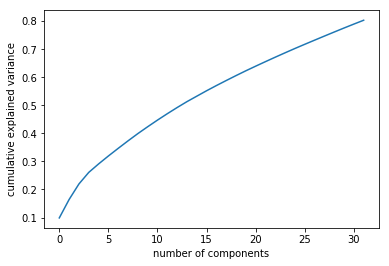

In [38]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

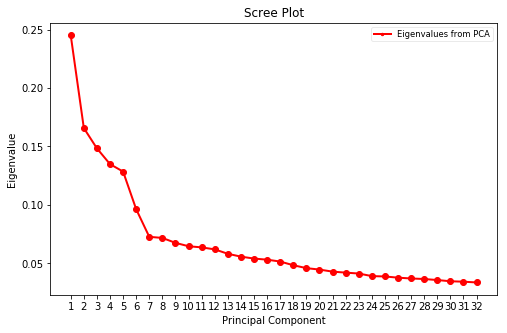

In [24]:
import matplotlib.font_manager as fnt
num_obs = 5866
num_vars = 32

eigvals = pca.explained_variance_

fig = plt.figure(figsize=(8,5))
sing_vals = np.arange(num_vars) + 1
plt.plot(sing_vals, eigvals, 'ro-', linewidth=2)
plt.xticks(np.arange(min(sing_vals), max(sing_vals)+1, 1.0))
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
#I don't like the default legend so I typically make mine like below, e.g.
#with smaller fonts and a bit transparent so I do not cover up data, and make
#it moveable by the viewer in case upper-right is a bad place for it 
leg = plt.legend(['Eigenvalues from PCA'], loc='best', borderpad=0.3, 
                 shadow=False, prop=fnt.FontProperties(size='small'),
                 markerscale=0.4)
leg.get_frame().set_alpha(0.4)
leg.draggable(state=True)
plt.show()

In [67]:
loadings.transpose()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
america,-0.022729,-0.130063,0.012158,0.276735,0.428464,-0.014120,-0.137730,-0.089846,0.095781,-0.066566,-0.024929,-0.092772,0.030256
american,0.013605,0.002563,0.041009,0.008225,-0.048420,-0.069858,-0.091158,-0.153401,0.003889,0.124931,0.088740,-0.001652,0.133173
back,0.009422,0.005587,0.009273,0.019686,0.008545,-0.008915,0.032632,0.006883,-0.000841,0.023624,0.057389,-0.035401,0.055344
big,-0.019242,-0.012712,-0.011980,0.023546,0.038557,-0.017915,0.093541,0.019079,-0.041788,-0.077486,0.009590,0.106304,-0.001240
ca,0.025056,0.014516,0.227700,0.169202,-0.089159,0.097440,-0.020387,0.021910,-0.001062,0.003532,-0.026323,0.020344,0.013820
clinton,0.015743,0.143684,0.013636,-0.048410,0.066091,0.049180,-0.030653,-0.008903,-0.020037,0.029297,-0.028505,0.030145,-0.054177
countri,0.003350,0.000462,0.013349,0.014739,0.022882,-0.041389,0.009468,-0.019355,-0.022886,0.087958,0.067788,0.023295,0.057964
cruz,-0.017889,-0.017844,0.044582,-0.018382,-0.035231,-0.028559,0.128531,0.036585,-0.069642,-0.113206,-0.002220,0.094793,-0.114093
day,0.013822,0.005753,-0.020191,0.027308,0.021363,-0.016377,0.052476,0.004390,-0.031321,-0.000919,-0.004828,0.034433,-0.014997
donald,0.063577,-0.108589,0.160078,-0.193810,0.115602,0.038670,0.005716,-0.101044,0.020097,0.021979,-0.001243,-0.031291,0.005801


In [60]:
pcscores

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,0.669423,-0.293748,-0.267513,0.415294,0.241270,-0.140187,-0.109760,-0.111983,-0.147824,-0.159081,-0.080156,-0.102665,0.002859
1,-0.239189,0.009286,-0.111924,-0.055487,-0.167204,-0.177909,-0.011324,-0.071341,-0.045346,-0.029196,-0.129020,-0.074825,-0.054872
2,1.605507,-0.393850,-0.555535,0.205660,-0.234374,-0.023986,-0.055977,-0.062697,-0.284791,-0.067111,-0.043645,-0.023051,-0.126497
3,-0.239189,0.009286,-0.111924,-0.055487,-0.167204,-0.177909,-0.011324,-0.071341,-0.045346,-0.029196,-0.129020,-0.074825,-0.054872
4,-0.572204,-0.453163,-0.556135,0.238231,0.265773,0.945213,0.004126,0.031341,-0.053580,0.229806,0.063090,-0.022742,-0.100446
5,0.813080,-0.236897,-0.331918,0.179499,-0.288043,-0.087049,0.020830,-0.096245,0.003233,-0.095351,-0.169628,-0.112654,0.077063
6,-0.385043,-0.393689,-0.173043,0.839208,1.213729,-0.248576,-0.115818,-0.145044,0.001052,-0.017070,-0.269713,-0.108775,-0.037331
7,-0.385043,-0.393689,-0.173043,0.839208,1.213729,-0.248576,-0.115818,-0.145044,0.001052,-0.017070,-0.269713,-0.108775,-0.037331
8,-0.505305,-0.337214,-0.386201,0.330749,0.314159,0.606803,0.378492,0.022950,-0.438881,0.904644,0.524633,0.048739,0.065669
9,-0.239189,0.009286,-0.111924,-0.055487,-0.167204,-0.177909,-0.011324,-0.071341,-0.045346,-0.029196,-0.129020,-0.074825,-0.054872


In [62]:
words

['america',
 'american',
 'back',
 'big',
 'ca',
 'clinton',
 'countri',
 'cruz',
 'day',
 'donald',
 'famili',
 'get',
 'go',
 'great',
 'h',
 'hillari',
 'job',
 'let',
 'like',
 'make',
 'makeamericagreatagain',
 'million',
 "n't",
 'need',
 'new',
 'one',
 'peopl',
 'poll',
 'presid',
 're',
 'realdonaldtrump',
 'republican',
 'right',
 's',
 'say',
 'support',
 'thank',
 'time',
 'today',
 'trump',
 'trump2016',
 'us',
 'vote',
 'want',
 'watch',
 'win',
 'women',
 'work',
 'would',
 'year']

In [63]:
pc_names

['PC1',
 'PC2',
 'PC3',
 'PC4',
 'PC5',
 'PC6',
 'PC7',
 'PC8',
 'PC9',
 'PC10',
 'PC11',
 'PC12',
 'PC13']

In [186]:
iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names
target_names

array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10')

In [184]:

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

plt.figure()

explained variance ratio (first two components): [ 0.09077641  0.06139805  0.05495976  0.04996717  0.04759945  0.03566403
  0.02692619  0.02658056  0.02501653  0.02394563  0.02358439  0.02295115
  0.02155221  0.02065038  0.02003797  0.01968567  0.01909062  0.01792772
  0.01700936  0.01654689  0.01590129  0.01558296  0.01529627  0.01448028
  0.01437046  0.01398348  0.01373148  0.0135605   0.01323437  0.01284925
  0.0127091   0.01247183  0.01227752  0.01197576  0.01175146  0.01163103
  0.01128476  0.01104811  0.01099055  0.01092478  0.01064316  0.01054003
  0.01044695  0.01028736  0.00994999  0.009912    0.00969831  0.00946027
  0.00923227  0.00790429]


NameError: name 'target_names' is not defined